In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
import math
median_bed=math.floor(df.bedrooms.median())
median_bed

4

In [4]:
df.bedrooms.fillna(median_bed, inplace=True)

In [5]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [6]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']], df.price)

LinearRegression()

In [7]:
print(reg.coef_)
print(reg.intercept_)

[  112.06244194 23388.88007794 -3231.71790863]
221323.00186540396


In [8]:
reg.predict([[3000,3,40]])

array([498408.25158031])

In [9]:
112.06244194*3000+23388.88007794*3+-3231.71790863*40+221323.00186540396

498408.251574024

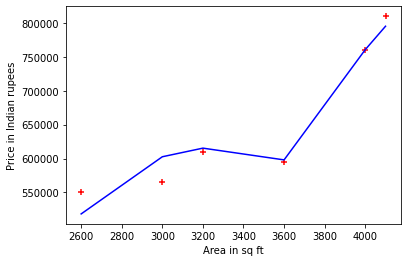

In [10]:
plt.scatter(df.area,df.price,color='red',marker='+')
plt.ylabel('Price in Indian rupees')
plt.xlabel('Area in sq ft')
plt.plot(df.area,reg.predict(df[['area','bedrooms','age']]), color='blue')

### Excercise

In [11]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [12]:
df.experience.fillna('zero', inplace=True)

In [13]:
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(), inplace=True)

In [14]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [15]:
from word2number import w2n 

In [16]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [17]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [18]:
reg.predict([[2,9,6]])

array([53205.96797671])

In [19]:
reg.predict([[12,10,10]])

array([92002.18340611])